# Week 3: Numerical Integration Methods

## Library Imports Go Here

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time
import random

## The Basic Integration Functions

### Box Integration

<font color = blue>
    
Write a function that implements the box approximation method.  Your function should take, as inputs, a function `function`, the lower and upper integration limits `x_initial` and `x_final`. and the number of rectangles to be used in the approximation `divisons`.  It should return the result of the approximation.

In [149]:
def box_method(function, x_initial, x_final, divisions):
    """
    implementation of the box approximation method
    function : the function whose integral we want to approximate
    x_initial : the lower bound of the integral
    x_final : the upper bound of the integral
    divisions : the number N of divisions that we are dividing the area into

    returns : the approximate integral of the function
    """
    del_x = (x_final - x_initial) / divisions
    approx = 0
    for i in range(int(divisions - 1)):
        approx += function(x_initial + (i * del_x)) # f_j
    approx = approx * del_x
    return approx

### Trapezoid Integration

<font color = blue>
    
Write a second function that does the same thing, but uses the trapezoidal method.  (If you want to, you can make this second function *use* the first function.)

In [152]:
def trap_method(function, x_initial, x_final, divisions):
    """
    implementation of the trapezoid approximation method
    function : the function whose integral we want to approximate
    x_initial : the lower bound of the integral
    x_final : the upper bound of the integral
    divisions : the number N of divisions that we are dividing the area into

    returns : the approximate integral of the function
    """
    del_x = (x_final - x_initial) / divisions
    approx = box_method(function, x_initial, x_final, divisions)
    approx += (del_x / 2) * (function(x_initial) - function(x_final - del_x))
    return approx

### Testing, testing

<font color = blue>
Test both of your pieces of code on the function

$$
f(x) = \frac{x^2}{2}
$$

with the limits of integration $[-1, 3]$ and `divisions`$ = 100$.  Also, as a **discussion** work out the integral analytically, and compare the results.

In [155]:
# should be 28/6
def f(x):
    """
    function x^2 / 2
    """
    return (x**2)/2


trap_method(f, -1, 3, 100)

4.334352000000001

solving this integral I found that the answer should be 28/6 which is what I see the computed value approaching when I inrease the number of division

## Gaussian Integration

<font color = blue>
We now want to use out numerical integration method to approximate the Gaussian integral

$$
\int_{-\infty}^{\infty} e^{-x^2} \, dx
$$

which has the known analytic value $\sqrt{\pi}$.  Here there is an additional challenge, becuase we can't expect to use $\pm\infty$ as inputs for our numerical work.

In [158]:
def gaussian(x):
    """
    gaussian integrand
    """
    return np.exp(-x**2)

### Plotting the Function

<font color = blue>
Begin by plotting the function $e^{-x^2}$.  This becomes approximately zero, far enough from $x = 0$.  Use the plot to appropriately choose limits of integration to use in the numerical work.

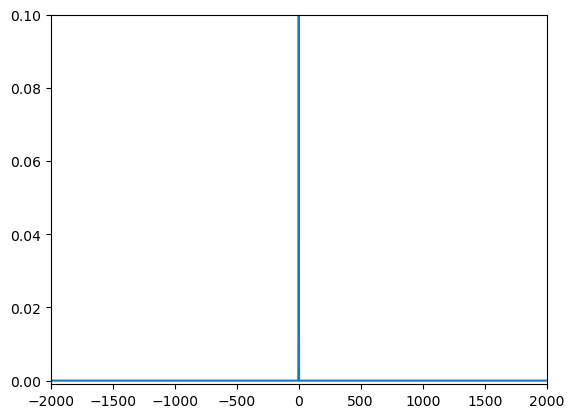

In [161]:
x_vals = np.arange(-10000, 10000, 1)
fx_vals = np.zeros(20000)
for i in range(len(x_vals)):
    fx = gaussian(x_vals[i])
    fx_vals[i] = fx

plt.xlim(-2000, 2000)
plt.ylim(-.001, .1)
plt.plot(x_vals, fx_vals)

### Evaluating the Integral

<font color = blue>
Using these limits, evaluate the Gaussian integral with your trapezoidal approximation function, and compare the result with the analytic value

In [164]:
print(trap_method(gaussian, -500, 500, 1000))
print(np.sqrt(np.pi))

1.7726372048266523
1.7724538509055159


### Sources of Error

<font color = blue>
    
The evaluation you have done actually has two sources of error: the error associated with approximating an integral as a series of trapezoidal areas, and the error associated with cutting off the region of integration.  It's instructive to know how much each is contributing to the error, and which is most significant.  (This will, of course, depend on your choices of `divisions` and the region of integration.)

Compute the approximation of the integral for some value of `divisions`, and then again for twice that value.  This decreasees the width of each trapezoid by $\frac{1}{2}$, and should make the approximation better.  Calculate the difference between the two results.

Then compare the result you had for your first value of `divisions` with a result where you double the total size of your region of integration.  You should also double your value of `divisions`, so that the width of each trapezoid is unchanged.  Calculate the difference between the original result and this result.

Finally, **discuss** the results of this analysis.

Note that this technique for analyzing numerical errors -- doubling (or cutting in half) a numerical parameter and seeing how much the result changes -- shouldn't be thought of as a rigorous, formal method.  But it is a good way to get a rough sense of scale for numerical errors.

In [167]:
# testing higher N
print(trap_method(gaussian, -500, 500, 1000))
print(trap_method(gaussian, -500, 500, 2000))
print(f'difference in accuracy when doubling N = {trap_method(gaussian, -500, 500, 1000) - trap_method(gaussian, -500, 500, 2000)}')

# testing larger region
print(trap_method(gaussian, -1000, 1000, 2000))
print(f'difference in accuracy with larger region = {trap_method(gaussian, -1000, 1000, 2000) - trap_method(gaussian, -500, 500, 1000)}')

1.7726372048266523
1.772453850905516
difference in accuracy when doubling N = 0.00018335392113622007
1.7726372048266523
difference in accuracy with larger region = 0.0


As can be seen from the results printed, the difference in accuracy when doubling N is far greater then the neglidgeable difference in accuracy that we get when increasing the bounds of integration while keeping the width of each trapezoid the same. This leads me to believe that the number of divisions (and in turn the width of each trapezoid) is more important than the area of integration for this function 

## The Sinc Function

<font color = blue>
    
Now we want to work at approximating the integral

$$
\int_{0}^{10} \frac{\sin x}{x} \, dx
$$

Although the integrand is actually finite for all values of $x$, a computer is going it have trouble evaluating it at $x = 0$.  The challenge this time is to find a way to work around this difficulty *that does not introduce additional sources of error*.  Explain your approach in a **discussion**, and evaluate the integral using `divisions` = 100.

In [171]:
def sinc(x):
    """
    sinc function
    """
    if x == 0:
        return 1
    else:
        return np.sin(x) / x

trap_method(sinc, 0, 10, 100)

1.7679346639474693

For this problem, I had to do some trial and error to figure out what the best approach was. At first, I thought that in the special case that x = 0, I should return 0. With this approach we underestimate the value of the integral but as n gets larger the answer approaches the correct one. However, I then looked at the graph and thought about the small angle approximation and realized that when x = 0, the integrand should actually return 1. With this method, we overestimate the value of the integral which seems better to me because that is what typically happens with other integrals without special cases. Its important to note that when divisions = 100, returning 0 when x = 0 actually gets us closer to the correct value however it misrepresents the integral by completely ignoring the first trapezoid.

## The Period of the Pendulum

### Creating the Function

<font color = blue>
    
In class we showed that the (dimensionless) period of the pendulum as a function of initial angle $\theta_0$ would be

$$
\tau(\theta_0) = \frac{2}{\pi}\int_{0}^{\pi/2} \frac{1}{\sqrt{1 - \sin^2\frac{\theta_0}{2}\sin^2\phi}} \, d\phi
$$

Create a function that will find the period of the pendulum.  Check its output by evaluating it at $\theta_0 = 0.1$.  Assess whether or not the result makes sense in a **discussion** (what would the result be using the "small angle approximation"?

In [176]:
def period_of_pendulum(theta_o):
    """
    dimensionless period of a pendulum as a function of the initial angle theta_o

    theta_o : initial angle of the pendulum
    returns: period of the pendulum
    """
    def integrand(phi):
        """
        the integrand of the period integral as a function of phi

        phi : dimensionless variable defined s.t sin(phi) = sin(theta / 2) / sin(theta_o / 2)
        """
        return 1 / (np.sqrt(1 - ((np.sin(theta_o/2) * np.sin(phi))**2)))
    return trap_method(integrand, 0, np.pi/2, 1000) * (2 / np.pi)

period_of_pendulum(.1)

0.9996228557055586

These results make sense because what this output is saying is that the actual period (T) is ~.999 times the value of the period if we are using the small angle approximation. This make sense because in this case our angle (theta_o) is in fact a small angle and because of this, the two results with and without the use of the small angle approximation are very similar.

### * Plotting the Period

<font color = blue>
    
Make a plot of $\tau$ as a function of $\theta_0$ over the range $[0, \pi - .01]$.  Add to the plot a horizontal line at $\tau = 1$ and a vertical line at $\theta_0 = \pi$, to make the plot easier to read.  **Discuss** the result thoroughly!

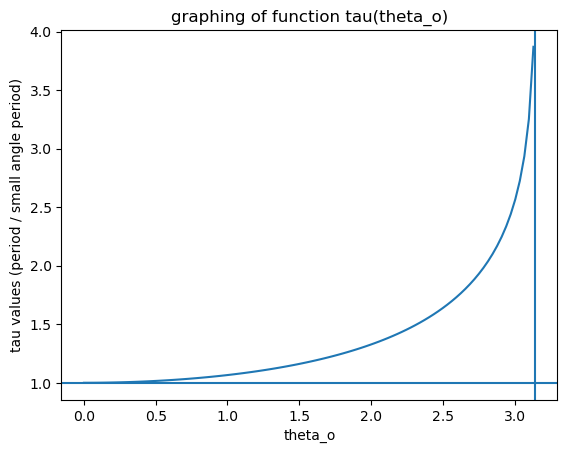

In [180]:
plt.axhline(1)
plt.axvline(np.pi)

# generating the data for the given theta_o values
tau_values = np.zeros(100) # 100 represents the # of datapoints we will have
theta_o_range = np.linspace(0, np.pi - .01, 100)

for i in range(100):
    tau_values[i] = period_of_pendulum(theta_o_range[i])

plt.xlabel("theta_o")
plt.ylabel("tau values (period / small angle period)")
plt.title("graphing of function tau(theta_o)")
plt.plot(theta_o_range, tau_values)

In this graph we can see that the vertical and horizantal line represent asymptotes in the graph. The horizontal line at tau = 1 shows that tau never goes below 1 (within .0001) because the small angle period never gets << the true period. We know this because as the theta_o gets smaller, the small angle theorem gets more accurate. The other asymptote is a strict asymptote that shows that as theta_o gets closer and closer to pi, tau blows up. This is because the small angle theorem period grossly underestimates the period and the true period blows up.

## Simpson's Method

### The Basic Function

<font color = blue>
    
Write a function that implements Simpson's method.  It should have the same input structure as your box and trapazoidal integration functons.

Since in this case `divisions` must be an even integer, in the event that the user inputs a value that is not an even integer have the function approximate `divisions` as the nearest even integer to the one provided, and then proceed with the calculation.

In [185]:
def simpson_method(function, x_initial, x_final, divisions):
    """
    Computes the simpson integral approximation for some function
    function : the function whose integral we want to approximate
    x_initial : the lower bound of the integral
    x_final : the upper bound of the integral
    divisions : the number N of divisions that we are dividing the area into (should be even #)

    returns : the approximate integral of the function
    """
    if divisions % 2 != 0:
        divisions = divisions - 1
    del_x = (x_final - x_initial) / divisions
    approx = 0
    for i in range(int((divisions / 2))):
        approx += function(x_initial + (2 * i * del_x)) + (4 * function(x_initial + (((2 * i) + 1) * del_x))) + function(x_initial + (((2 * i) + 2) * del_x))
    approx = approx * (del_x / 3)
    return approx

### Testing

<font color = blue>
Test your code on the same function

$$
f(x) = \frac{x^2}{2}
$$

that you previously used for the box and trapezoidal integrals.  Note that since this is quadratic, the Simpson method should give the *exact* correct answer (except for rounding errors).

In [188]:
simpson_method(f, -1, 3, 5)
# trap_method(f, -1, 3, 1000)

4.666666666666666

## Comparing Accuracy

<font color = blue>
    
You now have three separate pieces of code for implementing approximations to an integral, each with greater accuracy than the last.  This is a good opportunity to quantitatively compare the methods.  We will use the integral

$$
\int_{0}^{1} x^5 \, dx
$$

to examine the accuracy.  For each method, the number `divisions` controls how accurate the method is.  Specifically, we have the width of each region $\Delta x \propto \frac{1}{\mathrm{divisions}}$, and we expect the amount of error to decrease, the smaller $\Delta x$ is.

In [191]:
def g(x):
    """
    function g(x) = x^5
    """
    return x**5

### Analytic Calculation

<font color = blue>
    
Begin by working out the integral analytically as a **discussion**.

$\int^{1}_{0}x^5 = \frac{x^6}{6}.$ evaluated from 0 to 1
$ = \frac{1}{6} - 0 = 1/6$

### Box Integration Accuracy

<font color = blue>
    
For the box integration method, we expect the amount of error to be proportional to $\Delta x$, and thus to $\frac{1}{N}$ (where $N$ = `divisions`).

Compute an array of the results of the box integral for values of N between 100 and 1000 in steps of 10.   Plot these results and confirm the essential behavior is correct.

Then, use the command `curve_fit` from the module `scipi.optimize` to fit this data to a function of the form
$$
C + \frac{A}{N}
$$
where $C$ is the analytic result of the integral.  (Look up the documentation to figure out how to do this!)  Display this fitted curve together with the data on a single plot.

Fitted C = 0.16660074590727614
Fitted A = -1.4529260709815628


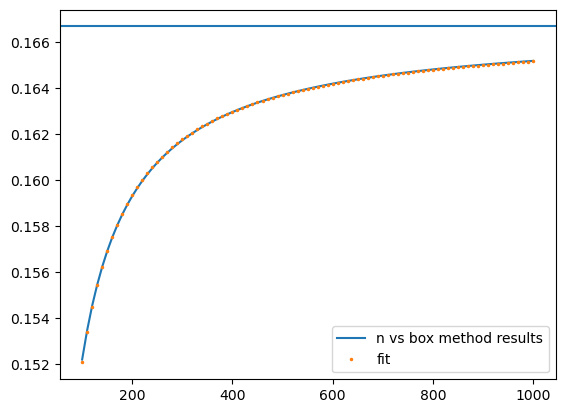

In [283]:
n_values = np.arange(100, 1010, 10)
box_method_results = np.zeros(91)

# generating the values of the fit as n increases
for i in range(91):
    ith_value = box_method(g, 0, 1, n_values[i])
    box_method_results[i] = ith_value

def model(N, C, A):
    """
    model function respresenting the form we want to fit our n vs integral answer graph to

    N : number of divisions
    C : analytic result of the integral
    A : constant
    """
    return C + (A/N)

# conducting the fit
initial_guess = [1.0, 1.0]  # Initial guess for C and A
popt, pcov = curve_fit(model, n_values, box_method_results, p0=initial_guess)
C_fit, A_fit = popt
print(f"Fitted C = {C_fit}")
print(f"Fitted A = {A_fit}")

# generating the points for the fitted function
points = np.zeros(91)
for i in range(91):
    points[i] = model(n_values[i], C_fit, A_fit)

# plotting the results agains the fitted values with a vertical line at the correct answer to the integral
plt.plot(n_values, box_method_results, label = "n vs box method results")
plt.plot(n_values, points, 'o', markersize=1.5, label = "fit")
plt.legend()
plt.axhline(1/6)


### Trapezoid Integration Accuracy

<font color = blue>
Repeat the above procedure, but this time using the Trapezoid integration method, where the error should decrease as $\frac{1}{N^2}$.

Fitted C = 0.16657036877990578
Fitted A = -1.9312269612375783


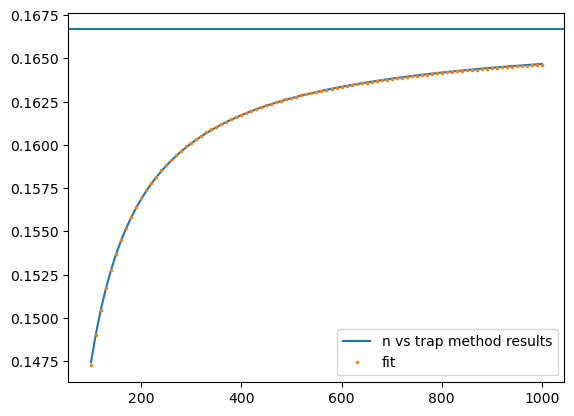

In [287]:
n_values = np.arange(100, 1010, 10)
trap_method_results = np.zeros(91)

# generating the values of the fit as n increases
for i in range(91):
    ith_value = trap_method(g, 0, 1, n_values[i])
    trap_method_results[i] = ith_value

# conducting the fit
initial_guess = [1.0, 1.0]  # Initial guess for C and A
popt, pcov = curve_fit(model, n_values, trap_method_results, p0=initial_guess)
C_fit, A_fit = popt
print(f"Fitted C = {C_fit}")
print(f"Fitted A = {A_fit}")

# generating the points for the fitted function
points = np.zeros(91)
for i in range(91):
    points[i] = model(n_values[i], C_fit, A_fit)

# plotting the results agains the fitted values with a vertical line at the correct answer to the integral
plt.plot(n_values, trap_method_results, label = "n vs trap method results")
plt.plot(n_values, points, 'o', markersize=1.5, label = "fit")
plt.legend()
plt.axhline(1/6)

### Simpson's Rule Accuracy

<font color = blue>
Finally, repeat the exercise one more time, with Simpson's rule, which we expect to have errors that scale as $\frac{1}{N^4}$.

[ 100  110  120  130  140  150  160  170  180  190  200  210  220  230
  240  250  260  270  280  290  300  310  320  330  340  350  360  370
  380  390  400  410  420  430  440  450  460  470  480  490  500  510
  520  530  540  550  560  570  580  590  600  610  620  630  640  650
  660  670  680  690  700  710  720  730  740  750  760  770  780  790
  800  810  820  830  840  850  860  870  880  890  900  910  920  930
  940  950  960  970  980  990 1000]
Fitted C = 0.16666666608904898
Fitted A = 2.7658228612792647e-07


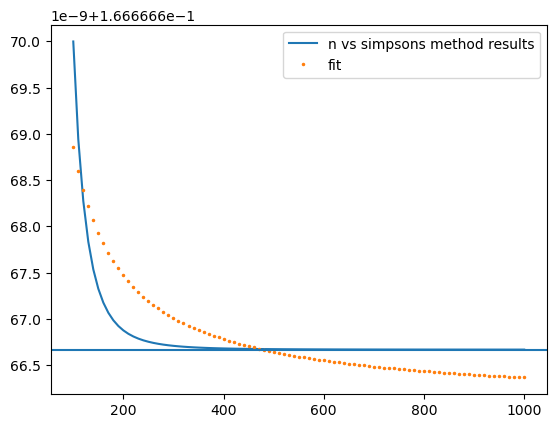

In [292]:
n_values = np.arange(100, 1010, 10)
simpson_method_results = np.zeros(91)

# generating the values of the fit as n increases
for i in range(91):
    ith_value = simpson_method(g, 0, 1, n_values[i])
    simpson_method_results[i] = ith_value

# conducting the fit
initial_guess = [1, 1]  # Initial guess for C and A
popt, pcov = curve_fit(model, n_values, simpson_method_results, p0=initial_guess)
C_fit, A_fit = popt
print(f"Fitted C = {C_fit}")
print(f"Fitted A = {A_fit}")

# generating the points for the fitted function
points = np.zeros(91)
for i in range(91):
    points[i] = model(n_values[i], C_fit, A_fit)

# plotting the results agains the fitted values with a vertical line at the correct answer to the integral
plt.plot(n_values, simpson_method_results, label = "n vs simpsons method results")
plt.plot(n_values, points, 'o', markersize=1.5, label = "fit")
plt.legend()
plt.axhline(1/6)

### Discussion 

```
```

<font color = blue>

**Discuss** the results of this analysis.

What we can see from the graphs above, is a couple things. First, we can observe the shapes of the graphs, which we can see a drastic difference from the first 2 when compared to the last one. What this tells me, is that the box and trapezoid method underestimate the answer to the integral while the simpson method overestimates. We can also see that the graph of the box method, has less precise y axis values then either of the following two because it is less accurate then them. Going further we can see that the simpson method has much more precise y values (within 1e-7) because it is a more precise approximation of the integral.

## The Line of Charge

<font color = blue>
Here we want to compute and display the electric field in the vicinity of a line of charge with varying charge density (in dimensionless form)

$$
\lambda(s) = \frac{1}{1 + s^2}
$$

which generates an (also dimensionless) electric field with components

$$
E_x(x, y) = \int_{-\infty}^{\infty} \left(\frac{1}{1 + s^2}\right)\left(\frac{x - s}{((x -s)^2 + y^2)^{3/2}}\right) \, ds
$$

$$
E_y(x, y) = \int_{-\infty}^{\infty} \left(\frac{1}{1 + s^2}\right)\left(\frac{y}{((x -s)^2 + y^2)^{3/2}}\right) \, ds
$$

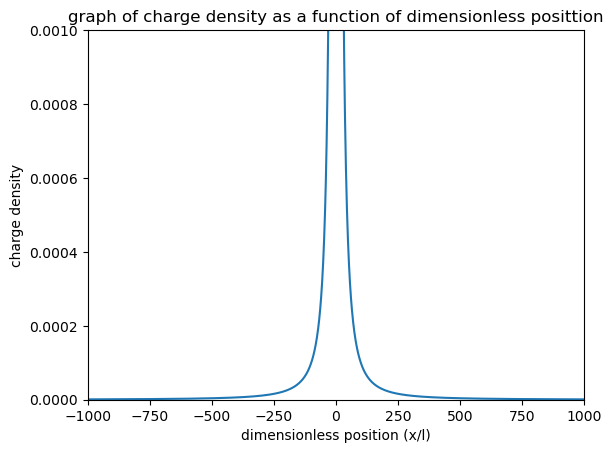

In [348]:
def line_charge(s):
    """
    function modeling a line charge with varying charge density
    s : dimensionless position (x/l)
    returns : the charge density at dimensionless position s
    """
    return 1/(1 + s**2)

s_values = np.arange(-1000, 1000, 1)
charge_density_values = np.zeros(2000)
for i in range(2000):
    charge_density_values[i] = e_field_line_charge(s_values[i])

plt.xlabel("dimensionless position (x/l)")
plt.ylabel("charge density")
plt.title("graph of charge density as a function of dimensionless posittion")
plt.ylim(0, .001)
plt.xlim(-1000, 1000)
plt.plot(s_values, charge_density_values)


### Limits of Integration

<font color = blue>

We know we cannot use "infinity" as a limit of integration in numerical work, so we must begin by choosing appropriate limits of integration.  In this case, the story is complicated by the fact that the behavior of the integrand will depend on the input values of $x$ and $y$ -- the location at which we want to evaluate the electric field.  

Later on, we will restrict our attention to locations in the square region $[-10, 10]$ and $[-10, 10]$.  So below, make sure that your choices of integration cut-offs will work for this entire range of locations (except for *on* the x-axis, where the integrands are badly behaved).
    
Then, **discuss** how you approached this challenge and what the results of your analysis were.

In order to approach this challenge I decided to of course graph the line charge to understand that portion of the integrand in the x and y components of the dimensionless E field. Doing this I saw that very roughly, I could say that the absolute value of a dimensionless position x/l roughly predicted the magnitude of the charge density. The relationship that I saw was that if dimensionless position was on the order of $10^x$, then charge density is on the order $10^{-x-2}$
I also observed the expression to the write of the $1/(1+s^2)$ term in both of the integrals which I found to either greatly increase or greatly decrease the scale of what I saw in the charge density graph depending on whether x and y and << 1 or >> 1.

This observation lead me to the bounds of integration, -1000, 1000 which seem like the most time efficient bounds that will get us an accurate answer.

### Essential Function

<font color = blue>
    
Now write a function that takes as inputs $x$ and $y$, and outputs $[E_x, E_y]$ as an array.  

Test your function for a choice of $x$ and $y$ that is "close to" the center, and for a choice that is "far away" (but make sure $-10, < x, y < 10$.)  

As a **discussion**, confirm that both results match the analytic expectations.

In [383]:
def dimensionless_e_x(x, y):
    """
    The integral which gives dimensionless x component of the E field
    x : x position where we are evaluating the E field at (dimensionless x/l)
    y : y position where we are evaluating the E field at (dimensionless y/l)
    returns : the dimensionless E fields x component
    """
    def integrand(s):
        """
        Models the integral for the x component of the dimensionless E field
        s : dimensionless position which we are integrating with respect to
        returns : the integrand which we will later integrate
        """
        return (1/(1 + s**2)) * ((x - s) / ((((x - s)**2) + y**2)**(3/2)))
        
    return trap_method(integrand, -1000, 1000, 2000)

def dimensionless_e_y(x, y):
    """
    The integral which gives dimensionless y component of the E field
    x : x position where we are evaluating the E field at (dimensionless x/l)
    y : y position where we are evaluating the E field at (dimensionless y/l)
    returns : the dimensionless E fields y component
    """
    def integrand(s):
        """
        Models the integral for the y component of the dimensionless E field
        s : dimensionless position which we are integrating with respect to
        returns : the integrand which we will later integrate
        """
        return (1/(1 + s**2)) * ((y) / ((((x - s)**2) + y**2)**(3/2)))
    return trap_method(integrand, -1000, 1000, 2000)

def dimensionless_e(x, y):
    """
    Function that returns anna array of the x and y components of the E field in dimensionless form
    x : x position where we are evaluating the E field at (dimensionless x/l)
    y : y position where we are evaluating the E field at (dimensionless y/l)
    returns : the dimensionless E field [Ex, Ey]
    """
    return [dimensionless_e_x(x, y), dimensionless_e_y(x, y)]

print(dimensionless_e(.001, .001))
print(dimensionless_e(9, 9))
print(dimensionless_e(-9, 9))
print(dimensionless_e(-9, -9))

[353553.3884725148, 353553.3916536599]
[0.012203005663360002, 0.01418668167630654]
[-0.012203005657347247, 0.014186681676307992]
[-0.012203005657347247, -0.014186681676307992]


I can tell that these results match the analytic descriptions by confirming two things. First I can confirm that when we get arbitrarily close the the line of charge (like in the first printed example), the magnitude of the E field gets arbitrarily large. Secondly I can confirm that based off of position, the E field should always be pointing away from the line of charge which is also confirmed by the 3 final printed examples, where the signs are switch and yet still the dimensionless E field is pointing away from the line charge.

### Timing Analysis and Grid Selection

```
```

<font color = blue>

Use the `time` function (from the `time` module) to estimate how long it takes to compute a single pair $(E_x,E_y)$.  Based on this calculation (and how long you're willing to wait to get your computational results),  decide on a set of $(x, y)$ coordinates that cover the range $x, y \in [-10, 10]$.  Make sure you *do not* have any points that lie exactly on the line $y = 0$, as this will involve a divergent integrand.  

You will also need a grid that covers the range $x, y \in [-1, 1]$ (but this should be easy to do once you have the first grid).

**Discuss** the decisions you made and how you came to them.

In [356]:
times = np.zeros(10)

for i in range(10): # 10 = sample size for the random values x and y
    x = random.uniform(-10, 10)
    y = random.uniform(-10, 10)
    start = time.time()
    dimensionless_e(x, y)
    stop = time.time()
    times[i] = stop - start

print(f'the time it takes to compute a single pair E_x, E_y = {np.sum(times) / 10} seconds')

N = 1001

x = np.linspace(-10, 10, N) 
x = x[x != 0]

y = np.linspace(-10, 10, N) 
y = y[y != 0]

the time it takes to compute a single pair E_x, E_y = 0.0019670724868774414 seconds
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   1.   2.   3.   4.
   5.   6.   7.   8.   9.  10.]


I found that it takes ~2*10^-3 seconds to compute a single pair (E_x, E_y). From this calculation I figured that I would be okay spending anywhere up to 2 seconds to get my computational results. From this I decided to generate 999 pieces of data between -10 and 10 for both x and y.

### * Graphing the Electric Field

<font color = blue>
    
Our goal is now to generate a graphic that displays our electric field.  To do this you can use the command `quiver` in the module `matplotlib.pyplot`, and you should begin by looking up the documentation for this.  It takes as inputs four lists: a set of x-coordinates, a set of y-coordinates, a set of x-components for the vector at each coordinate, and a similar set of y-components.

Collect the necessary data, and create your plot.  After you have done this, generate a second list, but this time focusing on the range $x, y \in [-1, 1]$, and repeat the process.

Note: be prepared to play around a little to find a list of points that works well.

**Discuss** the results thoroughly (focussing on the physics!)

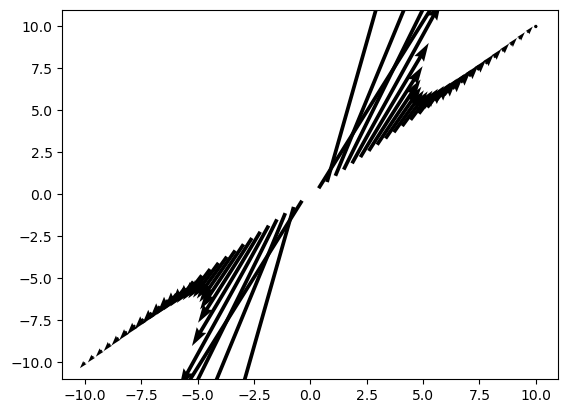

In [419]:
# N = 1001

# x = np.linspace(-10, 10, N) 
# x = x[x != 0]

# y = np.linspace(-10, 10, N) 
# y = y[y != 0]

# X, Y = np.meshgrid(x, y)

# for i in range(N - 2): # 999 = # of elements in x and y lists
#     U, V = dimensionless_e(x[i], y[i])

# plt.quiver(X, Y, U, V, scale=.001)
# plt.show()

#### Despite the data being good, cant see the graph so going to redo with smaller N despite bigger N being better other than the graph

N2 = 55

x2 = np.linspace(-10, 10, N2) 
x2 = x2[x2 != 0]

y2 = np.linspace(-10, 10, N2) 
y2 = y2[y2 != 0]

u2 = np.zeros(N2 - 1)
v2 = np.zeros(N2 - 1)

for i in range(N2 - 2): # of elements in x and y lists
    u2[i] = dimensionless_e(x2[i], y2[i])[0]
    v2[i] = dimensionless_e(x2[i], y2[i])[1]

plt.quiver(x2, y2, u2, v2, scale=1)
plt.show()

This makes sense in terms of the physics of the problem because as can be seen in the graph, the arrows are evenly distributed between the 4 quadrants with all of the arrows pointing away from the line of charge as should be expected in an electric field. Along with this, we can see symmetry within the graph as we should expect from a symmetrical charge distribution. Lastly, I know that this graph makes sense because as the vectors get closer to x = 0, their size increases and vice versa as we know to expect from the given E field setup.

## Any Other Problem

<font color = blue>
Come up with a physical problem (different from the ones analyzed above) that yo can use Simpson's method to solve.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and discuss their significance.

Solving for the expectation value of x in a given wave function $\psi(x)$ with paramters A B and C where A should be the expectation value of x

3.8263147199853584

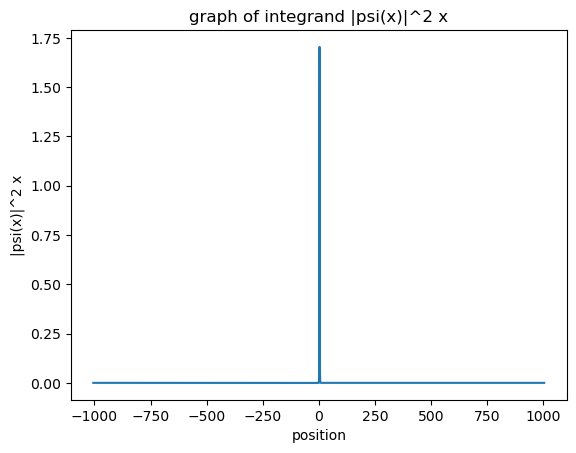

In [447]:
def my_problem(A = np.pi, B = 1, C = 1):
    """
    function modeling our function psi(x) that prints its graph and solves for <x>
    and outputs its integral
    A : constant A with units length
    B : constant B with units length^-1
    C : constant C with units length^-1/2
    returns : psi(x) the value of our wave function at x
    """
    def integrand(x):
        """
        integrand for the expectation value of x for function psi(x)
        x : position of our particle
        return : psi(x) the value of our wave function at x
        """
        return (C * np.exp(-B * abs(x - A)))**2 * x
    x = np.linspace(-1005, 1005, 2010)
    y = np.zeros(2010)
    for i in range(2010):
        y[i] = integrand(x[i])
    plt.title("graph of integrand |psi(x)|^2 x")
    plt.xlabel("position")
    plt.ylabel("|psi(x)|^2 x")
    plt.plot(x, y)
    return simpson_method(integrand, -1000, 1000, 2000)

my_problem()

What we see from the output of this function is a graph of the integrand showing what the are we are solving for is along with the computed answer. This is interesting because as we run the function with different values of A (keeping B and C = 1) we can see that the computed answer is within some uncertainty of what we expect the answer to be. This is also interesting because this was a HW question in my physics 220 class that I had to solve by hand so being able to compute and the integral with any constant values gives me great insight on the answer that I should be expecting.